# Stuart Harley
### Machine Learning Week 2 Problem Set

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix

### 1)

In [2]:
x1 = np.linspace(0, 10, 20)
xv, yv = np.meshgrid(x1, x1)

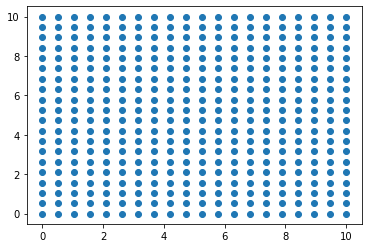

In [3]:
plt.scatter(xv, yv);

In [4]:
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
w = np.array([5, 3])
a = -10
fx = np.dot(X, w) + a

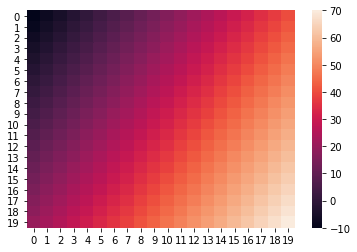

In [5]:
heatmap_data = fx.reshape(20, 20)
heatmap = sns.heatmap(heatmap_data)

In [6]:
heatmap_binary = np.zeros(heatmap_data.shape)
mask = heatmap_data > 0
heatmap_binary[mask] = 1

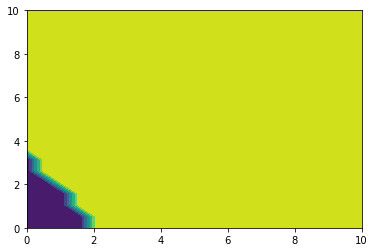

In [7]:
plt.contourf(xv, yv, heatmap_binary);

### 2)

i:   <1,1> • (r - (5,7)) = 0

ii:  <-1,-1> • (r - (5,7)) = 0

iii: <1,1,0> • (r - (1,2,3)) = 0

iv:  <-1,-1,0> • (r - (1,2,3)) = 0

v:   You can't find a plane from n = <1,3,5,11> and r0 = (13, 17) because n has 4 dimensions by r0 only has 2. You are missing two dimensions on r0 so you don't know where to put the normal vector in the third and fourth dimensions.


vi-i:   y = -x + 12

vi-ii:  y = -x + 12

vi-iii: y = -x + 3

vi-iv:  y = -x + 3

The pairs i&ii and iii&iv are the same plane, just with opposite positive and negative sides.

vii-i


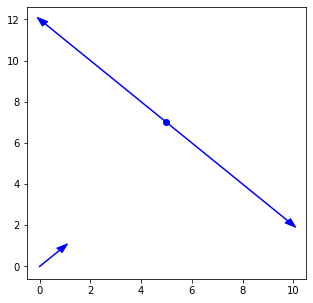

In [8]:
print('vii-i')
fig, axes = plt.subplots(figsize=(5,5))
axes.scatter(5,7, color='b') # r0
axes.plot([0,1], [0,1], 'b') # norm <1,1>
axes.arrow(1, 1, .1, .1, length_includes_head=True, head_width=.3, color='b')
axes.arrow(0, 12, -.1, .1, length_includes_head=True, head_width=.3, color='b')
axes.arrow(10, 2, .1, -.1, length_includes_head=True, head_width=.3, color='b')
axes.plot([0, 10], [12, 2], 'b'); # y = -x+12

vii-ii


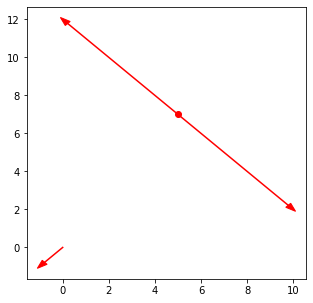

In [9]:
print('vii-ii')
fig, axes = plt.subplots(figsize=(5,5))
axes.scatter(5,7, color='r') # r0
axes.plot([0, -1], [0, -1], 'r') # norm <-1,-1>
axes.arrow(-1, -1, -.1, -.1, length_includes_head=True, head_width=.3, color='r')
axes.arrow(0, 12, -.1, .1, length_includes_head=True, head_width=.3, color='r')
axes.arrow(10, 2, .1, -.1, length_includes_head=True, head_width=.3, color='r')
axes.plot([0, 10], [12, 2], 'r'); # y = -x+12

vii-iii


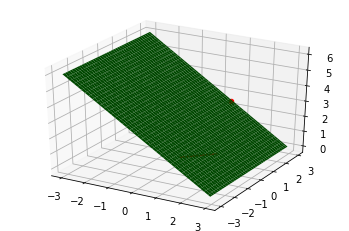

In [33]:
fig = plt.figure()
axes = plt.axes(projection='3d')
axes.plot([0, 1], [0, 1], [0,0], 'r')
axes.scatter(1, 2, 3, color='r')
def fun(x, y):
    return -x + 3;
x = y = np.arange(-3, 3, .05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
axes.plot_surface(X, Y, Z, color='g');
print('vii-iii')

vii-iv


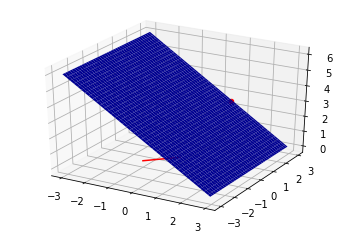

In [34]:
fig = plt.figure()
axes = plt.axes(projection='3d')
axes.plot([0, -1], [0, -1], [0,0], 'r')
axes.scatter(1, 2, 3, color='r')
def fun(x, y):
    return -x + 3;
x = y = np.arange(-3, 3, .05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
axes.plot_surface(X, Y, Z, color='b');
print('vii-iv')

In [38]:
def fun(x, y):
    return np.dot([2, 2], [5-x, 5-y])
print('(2, 15) = ' + str(fun(2, 15)) + ', so negative')
print('(3, 17) = ' + str(fun(3, 17)) + ', so negative')
print('(4, 13) = ' + str(fun(4, 13)) + ', so negative')
print('(4, 1) = ' + str(fun(4, 1)) + ', so positive')
print('(5, 3) = ' + str(fun(5, 3)) + ', so positive')
print('(6, 2) = ' + str(fun(6, 2)) + ', so positive')

(2, 15) = -14, so negative
(3, 17) = -20, so negative
(4, 13) = -14, so negative
(4, 1) = 10, so positive
(5, 3) = 4, so positive
(6, 2) = 4, so positive


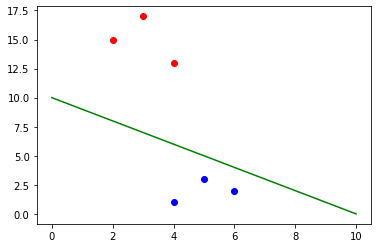

In [46]:
fig, axes = plt.subplots()
axes.scatter(2, 15, color='r')
axes.scatter(3, 17, color='r')
axes.scatter(4, 13, color='r')
axes.scatter(4, 1, color='b')
axes.scatter(5, 3, color='b')
axes.scatter(6, 2, color='b')
def y(x):
    return 10 - x
X = np.linspace(0, 10, 2)
Y = y(X)
axes.plot(X, Y, color='g');

iii: all of the points lying on the bottom of the plane were positive, all the points above were negative

The linear_decision_boundary_classifier works by determining which side of a boundary points fall onto based on whether they are positive or negative after performing a dot product operation between the normal vector and the difference between the point and a point on the plane. It then classifies points by doing the same thing and making a prediction from what it has learned about other points being either positive or negative.

### 3)

In [118]:
haberman = np.loadtxt('haberman.csv', delimiter=',')
haberman.shape

(306, 4)

In [105]:
mask = np.zeros(306, dtype=bool)
for x in range(306):
    rand = np.random.rand()
    if rand <= .7:
        mask[x] = True
training = haberman[mask]
testing = haberman[np.invert(mask)]

In [110]:
np.unique(haberman[:,3], return_counts=True)

(array([1., 2.]), array([225,  81]))

I expect there to be about 157 1's and 57 2's in the training set. 68 1's and 24 2's in the testing set.

In [111]:
print("Training: " + str(np.unique(training[:,3], return_counts=True)))
print("Testing: " + str(np.unique(testing[:,3], return_counts=True)))

Training: (array([1., 2.]), array([142,  57]))
Testing: (array([1., 2.]), array([83, 24]))


The counts are close to what I expected.

In [167]:
mask_2 = np.zeros(306, dtype=bool)
for x in range(306):
    if haberman[x, 3] == 1.0:
        mask_2[x] = True
haberman_ones = haberman[mask_2]
haberman_twos = haberman[np.invert(mask_2)]
mask_3 = np.zeros(225, dtype=bool)
for x in range(225):
    rand = np.random.rand()
    if rand <= .7:
        mask_3[x] = True
training_ones = haberman_ones[mask_3]
testing_ones = haberman_ones[np.invert(mask_3)]
mask_4 = np.zeros(81, dtype=bool)
for x in range(81):
    rand = np.random.rand()
    if rand <= .7:
        mask_4[x] = True
training_twos = haberman_twos[mask_4]
testing_twos = haberman_twos[np.invert(mask_4)]
training_2 = np.concatenate((training_ones, training_twos))
testing_2 = np.concatenate((testing_ones, testing_twos))

In [168]:
print("Training: " + str(np.unique(training_2[:,3], return_counts=True)))
print("Testing: " + str(np.unique(testing_2[:,3], return_counts=True)))

Training: (array([1., 2.]), array([152,  53]))
Testing: (array([1., 2.]), array([73, 28]))


The counts after stratifying the data are slightly closer to what I expected. However, because this data set is so small, I could redo the splits several times and have varying results for both strategies.

If you divide up a set without stratifying, it is possible that randomly it gets divided unevenly along class lines. If you train the model on this uneven division, the model will most likely not do as well in the real world because it is experiencing a different ration of classes than it was trained on. However, if you stratify into class sets and then divide randomly, you should have much more consistent results along class lines.

### 4)

In [190]:
y_true = ["bee", "bee", "bee", "wasp", "wasp", "wasp", "wasp", "wasp"]
y_pred = ["wasp", "bee", "bee", "wasp", "bee", "bee", "wasp", "wasp"]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=["bee", "wasp"]).ravel()
print("            Predicted")
print("            bee | wasp")
print("True  |bee  [" + str(tn) + "    " + str(fp) + "]")
print("Labels|wasp [" + str(fn) + "    " + str(tp) + "]")

            Predicted
            bee | wasp
True  |bee  [2    1]
Labels|wasp [2    3]


Pred Cancer, True Cancer (35) is True Positive

Pred benign, True Cancer (14) is False Negative

Pred Cancer, True Benign (38) is False Positive

Pred Benign, True Benign (60) is True Negative

In [191]:
print("Accuracy = " + str(95/147))
print("Precision = " + str(35/73))
print("Recall = " + str(35/49))

Accuracy = 0.6462585034013606
Precision = 0.4794520547945205
Recall = 0.7142857142857143


### 5) NOOOOPE. Already spent at least 5 hrs on this, not spending any more.